In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 5 Flower Types Classification Dataset

<b>5 farklı çiçeği sınıflandırma</b><br>
Bu projede 5 çeşit çiçek resmi ile geliştirilen model ile nesne tanıma uygulaması geliştiriyoruz.

In [3]:
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
img_path="/kaggle/input/5-flower-types-classification-dataset/flower_images/"
labels = [item for item in os.listdir(img_path) if os.path.isdir(os.path.join(img_path, item))]
labels

['Orchid', 'Sunflower', 'Tulip', 'Lotus', 'Lilly']

In [5]:
def set_df(dir):
    img_list=[]
    label_list=[]
    for label in labels:
        i=0
        for img_file in os.listdir(dir+label):
            i+=1
            img_list.append(dir+label+"/"+img_file)
            label_list.append(label)
    df=pd.DataFrame({"img":img_list, "label":label_list})
    return df

In [6]:
df=set_df(img_path)

In [7]:
df["label"].value_counts()

label
Orchid       1000
Sunflower    1000
Tulip        1000
Lotus        1000
Lilly        1000
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["encode_label"] = label_encoder.fit_transform(df["label"])

In [9]:
df.sample(10)

,img,label,encode_label
1836,/kaggle/input/5-flower-types-classification-da...,Sunflower,3
2082,/kaggle/input/5-flower-types-classification-da...,Tulip,4
4624,/kaggle/input/5-flower-types-classification-da...,Lilly,0
4760,/kaggle/input/5-flower-types-classification-da...,Lilly,0
565,/kaggle/input/5-flower-types-classification-da...,Orchid,2
3884,/kaggle/input/5-flower-types-classification-da...,Lotus,1
146,/kaggle/input/5-flower-types-classification-da...,Orchid,2
3738,/kaggle/input/5-flower-types-classification-da...,Lotus,1
4883,/kaggle/input/5-flower-types-classification-da...,Lilly,0
3655,/kaggle/input/5-flower-types-classification-da...,Lotus,1


(1778, 1000, 3)

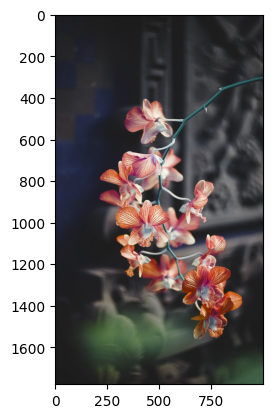

In [10]:
image=cv2.imread(str(df["img"][0]))
plt.imshow(image)
image.shape

In [42]:
size=128
x=[]
for imge in df["img"]:
    img=cv2.imread(str(imge))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img, (size,size))
    img=img/255.0 
    x.append(img)

## Modelleme

In [44]:
x=np.array(x)

In [40]:
y=df['encode_label']

2


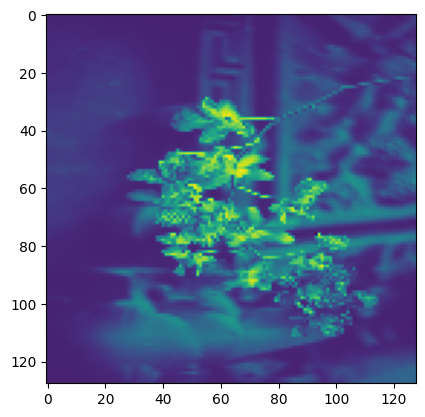

In [45]:
print(y[0])
plt.imshow(x[0])

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from sklearn.metrics import f1_score, confusion_matrix, classification_report

2024-05-06 11:59:51.079875: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 11:59:51.080016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 11:59:51.214264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [47]:
model=Sequential()
model.add(Input(shape=(size,size,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=.5))
model.add(Dense(5, activation='softmax'))
#categorical_crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32, epochs=25, verbose=1)

Epoch 1/25


2024-05-06 12:30:58.968794: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.57436, expected 2.7295
2024-05-06 12:30:58.968870: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.55057, expected 2.70572
2024-05-06 12:30:58.968887: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.26552, expected 2.42067
2024-05-06 12:30:58.968905: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 3.35075, expected 2.50589
2024-05-06 12:30:58.968921: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.14829, expected 2.30343
2024-05-06 12:30:58.968931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.96712, expected 2.12226
2024-05-06 12:30:58.968941: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.9168, expected 2.07194
2024-05-06 12:30:58.968951: E external/local_xla/xla/serv

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2791 - loss: 2.7957

2024-05-06 12:31:16.479033: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.59619, expected 1.88903
2024-05-06 12:31:16.479099: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.38608, expected 1.67892
2024-05-06 12:31:16.479115: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.9637, expected 2.25654
2024-05-06 12:31:16.479127: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.61107, expected 1.90391
2024-05-06 12:31:16.479139: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.27779, expected 1.57063
2024-05-06 12:31:16.479150: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.26453, expected 1.55737
2024-05-06 12:31:16.479160: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.36691, expected 1.65975
2024-05-06 12:31:16.479172: E external/local_xla/xla/ser

125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.2794 - loss: 2.7907 - val_accuracy: 0.2420 - val_loss: 1.9750
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.4062 - loss: 1.6455 - val_accuracy: 0.2580 - val_loss: 1.7936
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5307 - loss: 1.3338 - val_accuracy: 0.3520 - val_loss: 1.7182
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6546 - loss: 0.9387 - val_accuracy: 0.4240 - val_loss: 1.6949
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7737 - loss: 0.6450 - val_accuracy: 0.5960 - val_loss: 1.1961
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8734 - loss: 0.3747 - val_accuracy: 0.6280 - val_loss: 1.5655
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9425 - loss: 0.1852 - val_accuracy: 0.7040 - val_loss: 1.6793
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9660 - loss: 0.1167 - val_accuracy: 0.74

In [49]:
loss, accuracy = model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8170 - loss: 0.7589


In [50]:
accuracy

0.8059999942779541

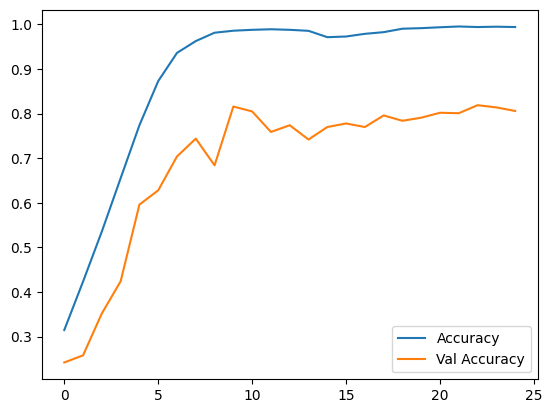

In [51]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [52]:
pred = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [53]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[141,  20,  19,   5,   7],
       [ 10, 179,   5,   4,  12],
       [ 12,  15, 173,   5,  11],
       [  6,   4,  12, 163,   5],
       [ 11,   6,  17,   8, 150]])

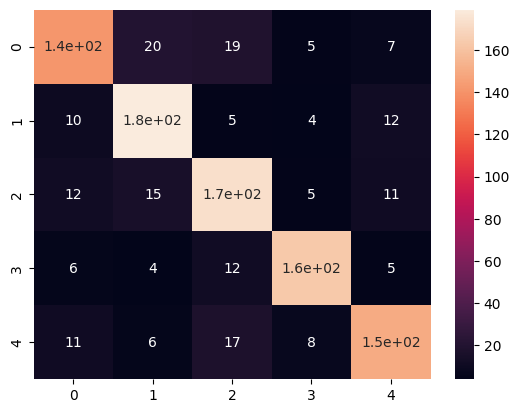

In [54]:
sns.heatmap(confusion_matrix(y_test, np.argmax(pred, axis=1)), annot=True);

In [55]:
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       192
           1       0.80      0.85      0.82       210
           2       0.77      0.80      0.78       216
           3       0.88      0.86      0.87       190
           4       0.81      0.78      0.80       192

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [3]:
label_mapping = {num: label for num, label in enumerate(label_encoder.classes_)}
for num, label in label_mapping.items():
    print(f"{num}: {label}")

NameError: name 'label_encoder' is not defined

In [2]:
def tahmin(img):
    img=cv2.resize(image, (size,size))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=img/255.0 
    img=np.array(img)
    img=np.expand_dims(img, axis=0)
    thmn=model.predict(img)
    thmn=np.argmax(thmn)
    return thmn

selected_images = df.sample(20)
selected_images = selected_images.reset_index(drop=True)

fig, axes = plt.subplots(5, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image=cv2.imread(str(selected_images["img"][i]))
    ax.imshow(image)
    ax.axis("off")
    pred=tahmin(image)
    ax.text(0.5, -0.2, "Orjinal Adı:"+label_mapping[selected_images["encode_label"][i]], transform=ax.transAxes, ha='center')
    ax.text(0.5, -0.4, "Tahmin Edilen:"+label_mapping[pred], transform=ax.transAxes, ha='center')


plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

## Sonuç:
5 farklı çiçek çeşitini öğrenip, tahmin eden bir model geliştirildi. Modelin Eğitim başarısı yaklaşık %99 iken Doğrulama başarısı yaklaşık %86 olmuştur. Modeldeki resimlerden rastgele seçilen 20 resim yeniden tahmin edilmiş ve sadece 7 tanesinin doğru tahmin edildiği görülmüştür.